### Import Library
---

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

### Import Data
---

In [2]:
image_data = "../image-classification/data/no-bg/"

### Melakukan Augmentasi pada Citra
---
Augmentasi dilakukan untuk memperbanyak data latih yang ada. Disebabkan data yang tersedia sangat sedikit, maka augmentasi ini sangat penting untuk dilakukan. Augmentasi yang dilakukan adalah sebagai berikut:
- **Horizontal Flip**: Membalik citra secara horizontal.
- **Rotation Range**: Memutar citra dengan sudut acak antara -40 hingga 40 derajat.
- **Width Shift Range**: Menggeser citra secara horizontal dengan jarak acak antara -0.2 hingga 0.2 dari lebar citra.
- **Height Shift Range**: Menggeser citra secara vertikal dengan jarak acak antara -0.2 hingga 0.2 dari tinggi citra.
- **Shear Range**: Melakukan geser citra dengan sudut acak antara -20 hingga 20 derajat.
- **Zoom Range**: Melakukan zoom in atau zoom out citra dengan jarak acak antara 0.8 hingga 1.2 dari ukuran citra.
- **Fill Mode**: Mengisi area kosong pada citra yang dihasilkan dari augmentasi dengan warna putih.
- **Rescale**: Mengubah skala citra dari 0-255 menjadi 0-1.

In [3]:
image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = image_datagen.flow_from_directory(
    image_data,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = image_datagen.flow_from_directory(
    image_data,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation' 
)

Found 223 images belonging to 3 classes.


Found 54 images belonging to 3 classes.


### Modelling
---
Model yang digunakan adalah model CNN (Convolutional Neural Network) dengan arsitektur sebagai berikut:
- **Conv2D**: Layer konvolusi dengan 32 filter, ukuran kernel 3x3, dan fungsi aktivasi ReLU.
- **MaxPooling2D**: Layer pooling dengan ukuran pool 2x2.
- **Conv2D**: Layer konvolusi dengan 64 filter, ukuran kernel 3x3, dan fungsi aktivasi ReLU.
- **MaxPooling2D**: Layer pooling dengan ukuran pool 2x2.
- **Conv2D**: Layer konvolusi dengan 128 filter, ukuran kernel 3x3, dan fungsi aktivasi ReLU.
- **MaxPooling2D**: Layer pooling dengan ukuran pool 2x2.
- **Flatten**: Mengubah citra 2D menjadi 1D.
- **Dense**: Layer fully connected dengan 128 neuron dan fungsi aktivasi ReLU.
- **Dense**: Layer fully connected dengan neuron sebanyak jumlah kelas dan fungsi aktivasi softmax.

Model kemudian dikompilasi dengan menggunakan optimizer Adam, loss categorical crossentropy, dan metric akurasi. 

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

### Training Model
---
Model dilatih dengan menggunakan data latih yang telah diaugmentasi. Model dilatih selama 100 epoch dengan batch size 32. Data validasi juga digunakan untuk memantau performa model selama pelatihan. Fungsi EarlyStopping digunakan untuk menghentikan pelatihan jika tidak ada peningkatan pada akurasi validasi selama 3 epoch berturut-turut. Restore Best Weights digunakan untuk mengembalikan bobot model ke bobot terbaik yang dicapai selama pelatihan.

In [5]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=100,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/100
7/7 [==============================] - 9s 1s/step - loss: 1.3168 - accuracy: 0.3722 - val_loss: 0.7588 - val_accuracy: 0.8333
Epoch 2/100
7/7 [==============================] - 9s 1s/step - loss: 0.5654 - accuracy: 0.8027 - val_loss: 0.4118 - val_accuracy: 0.8704
Epoch 3/100
7/7 [==============================] - 13s 2s/step - loss: 0.3575 - accuracy: 0.8834 - val_loss: 0.3229 - val_accuracy: 0.8519
Epoch 4/100
7/7 [==============================] - 13s 2s/step - loss: 0.3028 - accuracy: 0.8969 - val_loss: 0.2818 - val_accuracy: 0.9074
Epoch 5/100
7/7 [==============================] - 13s 2s/step - loss: 0.2300 - accuracy: 0.9103 - val_loss: 0.1681 - val_accuracy: 0.9444
Epoch 6/100
7/7 [==============================] - 13s 2s/step - loss: 0.2219 - accuracy: 0.9103 - val_loss: 0.1745 - val_accuracy: 0.9444
Epoch 7/100
7/7 [==============================] - 6s 699ms/step - loss: 0.1928 - accuracy: 0.9238 - val_loss: 0.1485 - val_accuracy: 0.9259
Epoch 8/100
7/7 [==========

### Model Evaluation
---
Model dievaluasi untuk mengetahui seberapa baik model dapat mengklasifikasikan citra.

In [6]:
model.evaluate(validation_generator)

2/2 [==============================] - 1s 189ms/step - loss: 0.0979 - accuracy: 0.9630


[0.09789330512285233, 0.9629629850387573]

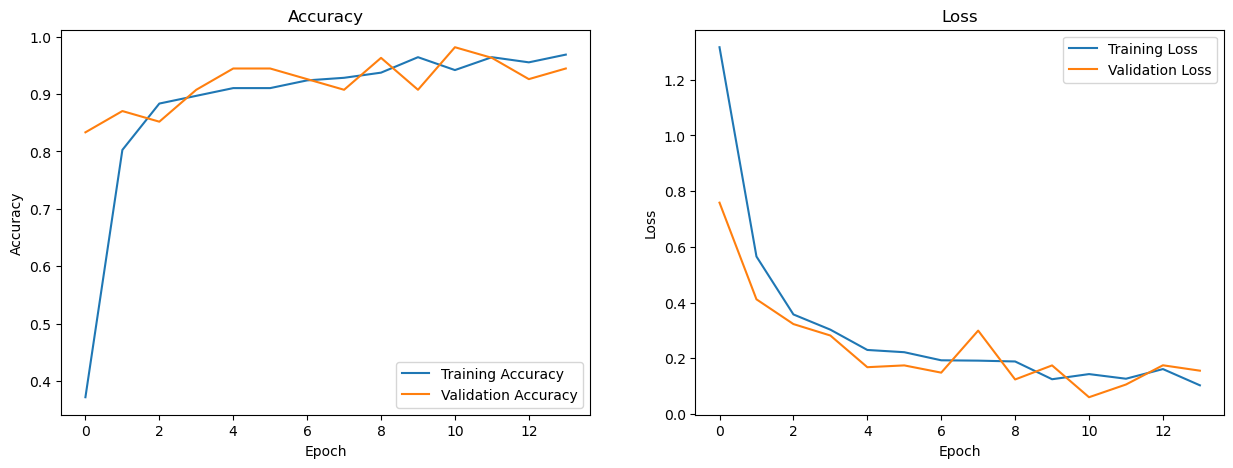

In [7]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()